In [1]:
# With Altair, you have two possible routes for data transformation; namely:

# pre-transformation in Python
# transformation in Altair/Vega-Lite

In [2]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract


alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
from vega_datasets import data
population = data.population()
population.head()

,age,people,sex,year
0,0,1483789,1,1850
1,0,1450376,2,1850
2,5,1411067,1,1850
3,5,1359668,2,1850
4,10,1260099,1,1850


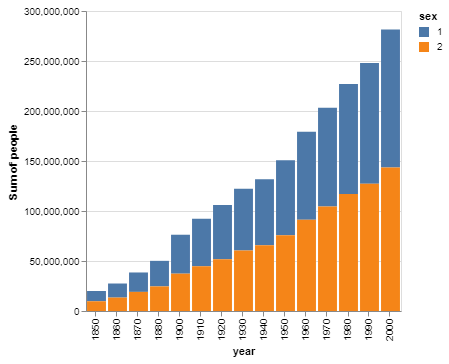

In [4]:
alt.Chart(population).mark_bar().encode(
x='year:O',
y='sum(people):Q',
color='sex:N')

In [12]:
# One way we could address this from Python is to use tools in Pandas to re-map these column names; for example:
# replace 1 with Men and 2 with Women

In [13]:
population['men_women'] = population['sex'].map({1: 'Men', 2: 'Women'})
population.head()

,age,people,sex,year,men_women
0,0,1483789,1,1850,Men
1,0,1450376,2,1850,Women
2,5,1411067,1,1850,Men
3,5,1359668,2,1850,Women
4,10,1260099,1,1850,Men


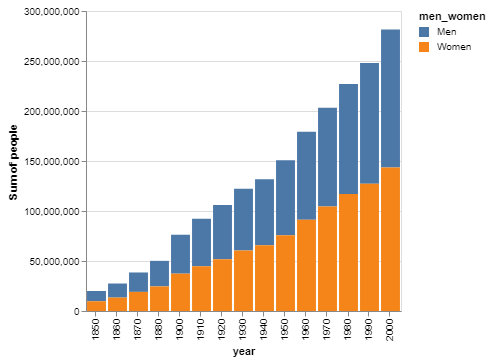

In [14]:
alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color='men_women:N'
)

In [15]:
# But Altair is designed to be used with URL-based data as well, in which such pre-processing is not available.
# In these situations, it is better to make the transformation part of the plot specification. Here this can be done via the 
# transform_calculate method,
# which accepts a Vega Expression, which is essentially a string that can contain a small subset of javascript operations:

In [16]:
# undo our addition of a column above...
population = population.drop('men_women', axis=1)

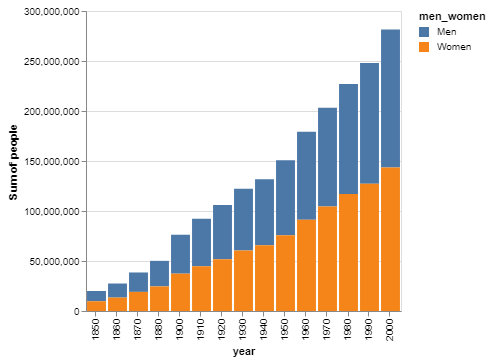

In [17]:
alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color='men_women:N'
).transform_calculate(
    men_women='datum.sex == 1 ? "Men" : "Women"'
)

# Thw word "datum "  is simply the convention by which Vega expressions refer to a row of the data

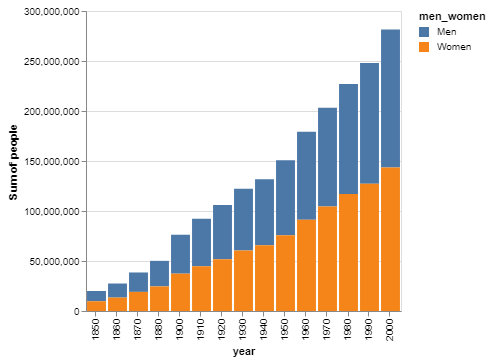

In [18]:
from altair.expr import datum, if_
# If you would prefer to build these expressions in Python, Altair provides a lightweight API to do so as shown above
alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color='men_women:N'
).transform_calculate(
    men_women=if_(datum.sex == 1, "Men", "Women")
)

# Filter Transform

In [19]:
# To  create a chart consisting only of the male population from these census records. 

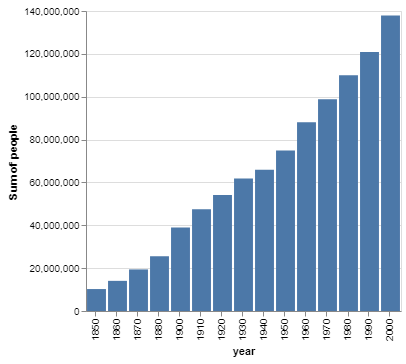

In [20]:
alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
).transform_filter(
    "datum.sex == 1"
)

In [21]:
# Altair provides a number of other transforms. Some will be quite familiar:

# transform_aggregate()
# transform_bin()
# transform_timeUnit()
# transform_lookup():
# transform_window():    